# 1 mport de données.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats

# chargement du df
df = pd.read_csv('carData.csv')

# affichage du header
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 2 exploration des données.

In [80]:
# taille du df
print(f"taille du jeu de données: {df.shape}")

# info general sur le df
print("\ninformations sur les types de données:")
df.info()

taille du jeu de données: (301, 9)

informations sur les types de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [81]:
# discription du df
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [82]:
# valeures manquantes
print("\nvaleurs manquantes par colonne:")
df.isnull().sum()


valeurs manquantes par colonne:


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### histograme de prix de vente

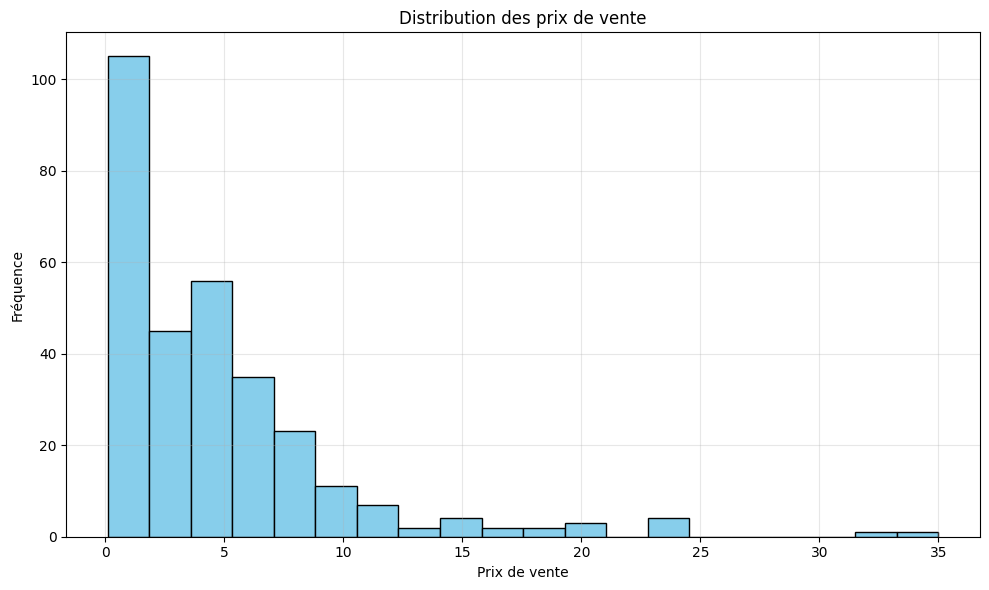

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(df['Selling_Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des prix de vente')
plt.xlabel('Prix de vente')
plt.ylabel('Fréquence')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3 visualisation des données.

### afficahge de Fuel_Type

<Figure size 1200x800 with 0 Axes>

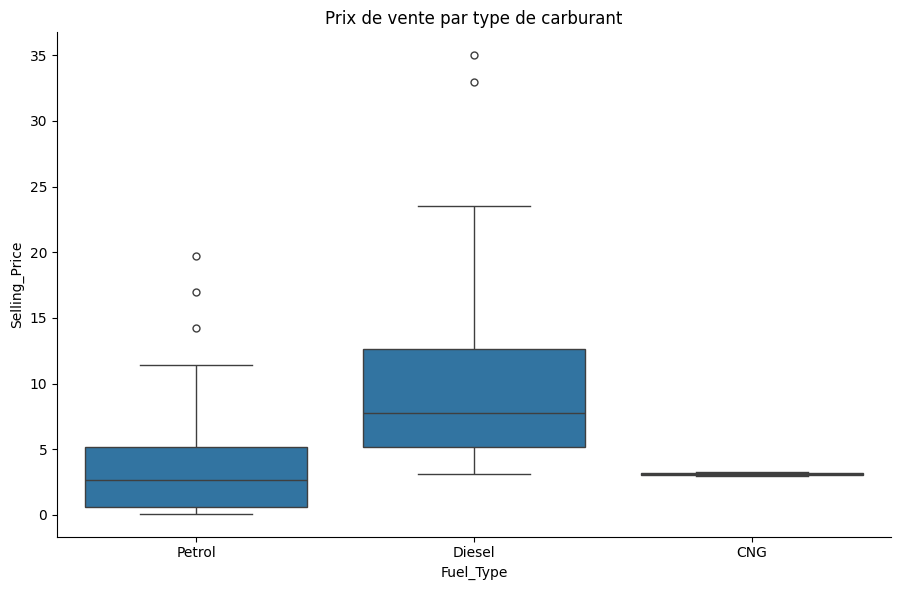

In [84]:
# Visualisation avec catplot
plt.figure(figsize=(12, 8))
sns.catplot(x='Fuel_Type', y='Selling_Price', data=df, kind='box', height=6, aspect=1.5)
plt.title('Prix de vente par type de carburant')
plt.tight_layout()
plt.show()

### affichage de Transmission

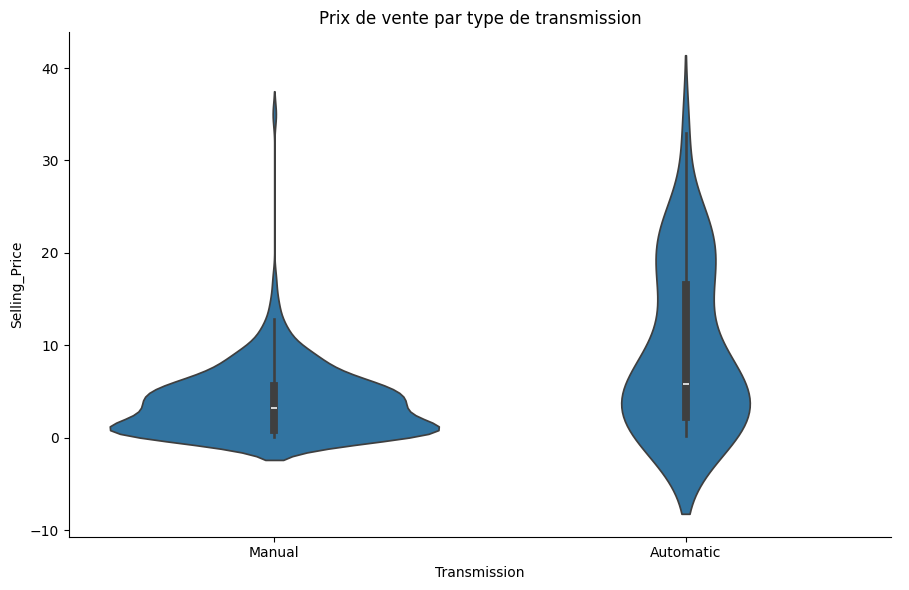

In [85]:
# Autre exemple de catplot
sns.catplot(x='Transmission', y='Selling_Price', data=df, kind='violin', height=6, aspect=1.5)
plt.title('Prix de vente par type de transmission')
plt.tight_layout()
plt.show()

# 4 corelation entre l'age et le prix de vente

Corrélation entre l'âge et le prix de vente: -0.2361


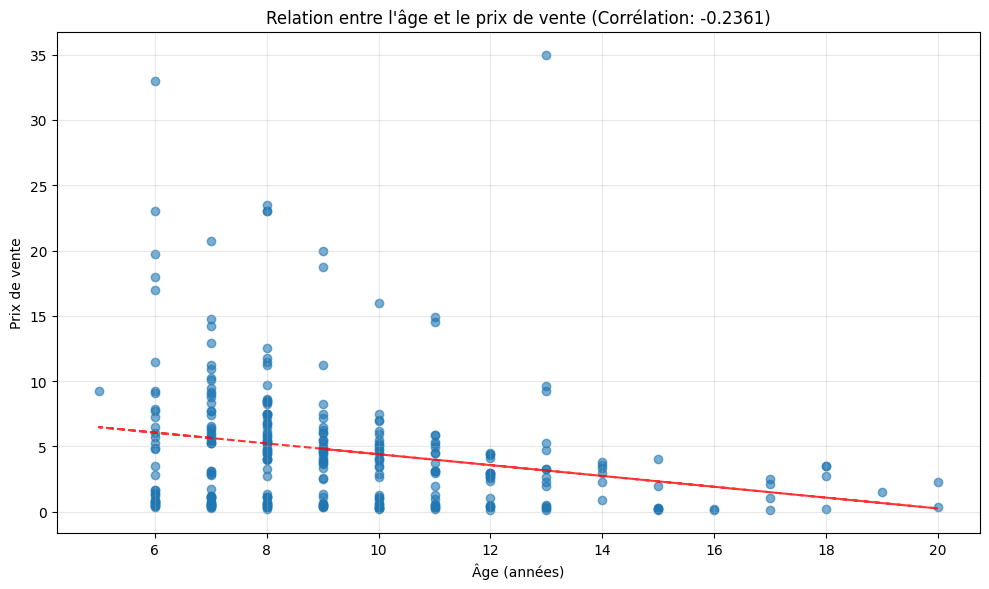

In [93]:
# Calculer l'âge des voitures (par rapport à 2023 comme année de référence)
current_year = 2023
df['Age'] = current_year - df['Year']

# Calculer la corrélation de Pearson
correlation = df['Age'].corr(df['Selling_Price'])
print(f"Corrélation entre l'âge et le prix de vente: {correlation:.4f}")

# Visualiser la relation avec un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Selling_Price'], alpha=0.6)
plt.title(f'Relation entre l\'âge et le prix de vente (Corrélation: {correlation:.4f})')
plt.xlabel('Âge (années)')
plt.ylabel('Prix de vente')
plt.grid(True, alpha=0.3)

# Ajouter une ligne de tendance
z = np.polyfit(df['Age'], df['Selling_Price'], 1)
p = np.poly1d(z)
plt.plot(df['Age'], p(df['Age']), "r--", alpha=0.8)
plt.tight_layout()
plt.show()

# 5 regression lineaire


Régression linéaire avec SciPy:
Pente: -0.4151
Ordonnée à l'origine: 8.5516
R²: 0.0558
p-value: 0.0000

Régression linéaire avec Scikit-Learn:
Pente: -0.3897
Ordonnée à l'origine: 8.1970
R² sur l'ensemble de test: 0.0616
MSE sur l'ensemble de test: 26.7198


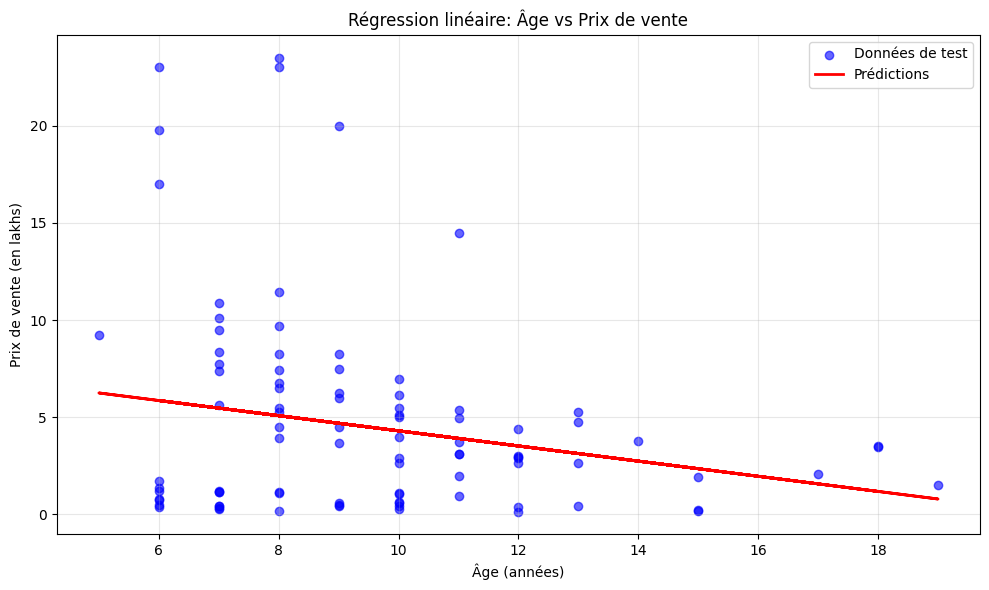

In [ ]:
# Préparation des données
X = df['Age'].values.reshape(-1, 1)  # Variable indépendante
y = df['Selling_Price'].values  # Variable dépendante

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Méthode 1: Régression linéaire avec SciPy
slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y)
print("\nRégression linéaire avec SciPy:")
print(f"Pente: {slope:.4f}")
print(f"Ordonnée à l'origine: {intercept:.4f}")
print(f"R²: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")

# Méthode 2: Régression linéaire avec Scikit-Learn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred = model_sklearn.predict(X_test)

print("\nRégression linéaire avec Scikit-Learn:")
print(f"Pente: {model_sklearn.coef_[0]:.4f}")
print(f"Ordonnée à l'origine: {model_sklearn.intercept_:.4f}")
print(f"R² sur l'ensemble de test: {r2_score(y_test, y_pred):.4f}")
print(f"MSE sur l'ensemble de test: {mean_squared_error(y_test, y_pred):.4f}")

# Visualisation du modèle
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Données de test')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prédictions')
plt.title('Régression linéaire: Âge vs Prix de vente')
plt.xlabel('Âge (années)')
plt.ylabel('Prix de vente')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# 6 model multivariable


Régression linéaire multiple:
Coefficient pour Age: -0.5107
Coefficient pour Kms_Driven: 0.0000
Coefficient pour Transmission_Manual: -4.3351
Ordonnée à l'origine: 12.6629
R² sur l'ensemble de test: 0.2966
MSE sur l'ensemble de test: 20.0283


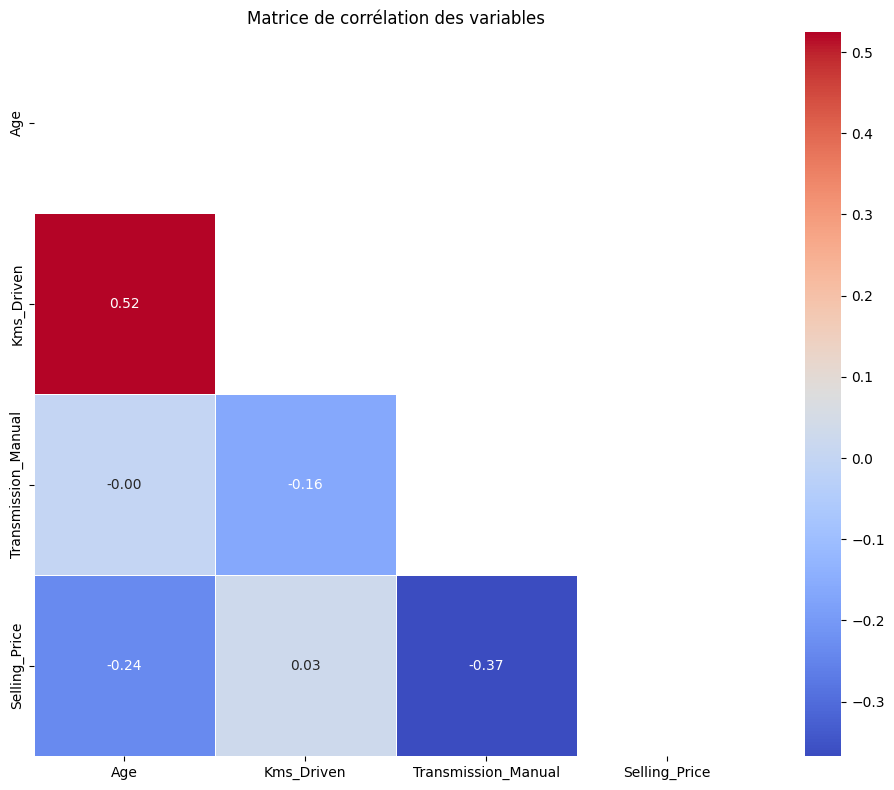

C:\Users\alixcover\AppData\Local\Temp\ipykernel_31276\1744253311.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Feature', y='Coefficient', data=importance, palette='viridis')


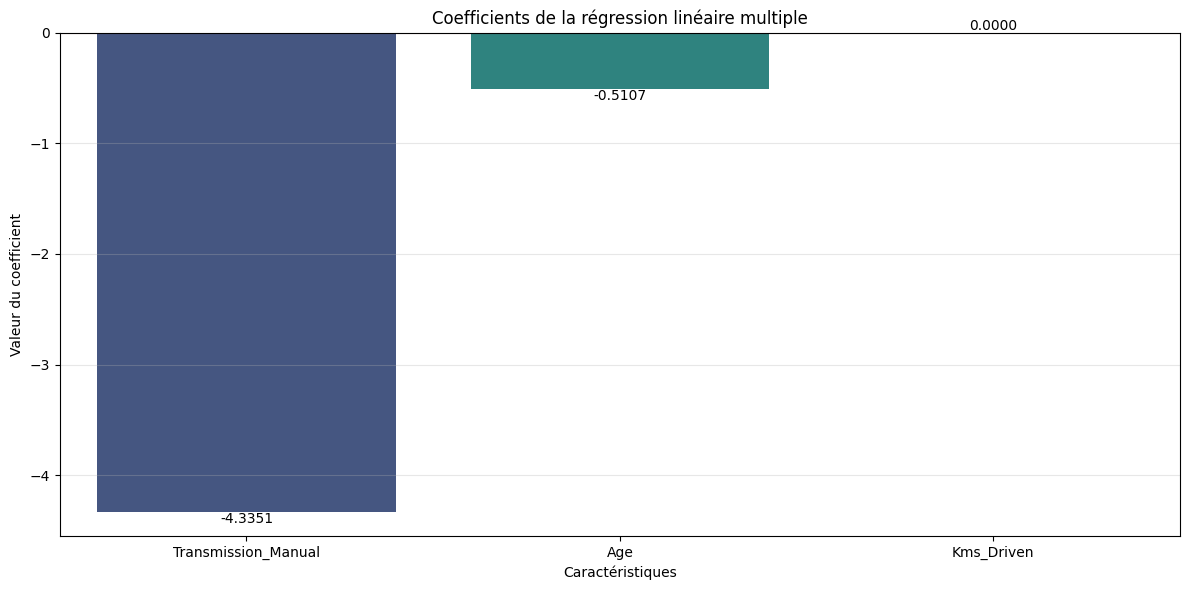

c:\Users\alixcover\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


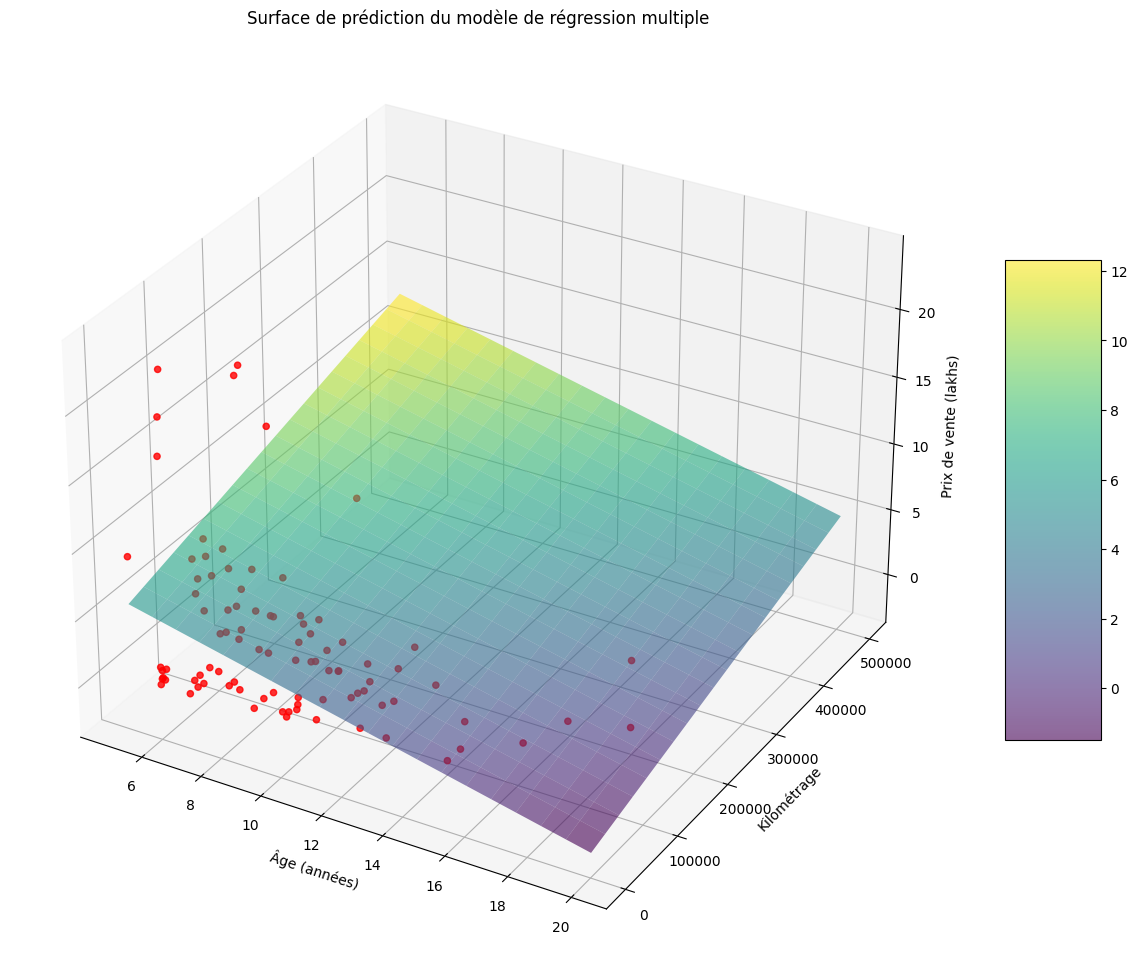

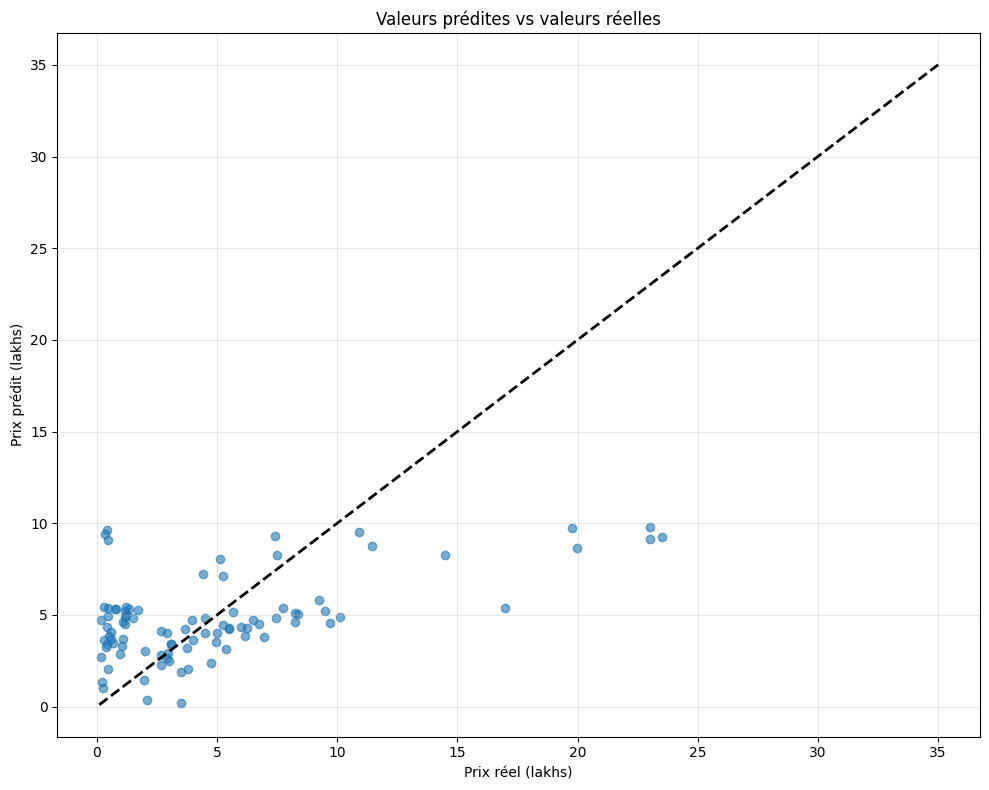

In [ ]:
# Préparation des données pour la régression multiple
# Conversion des variables catégorielles en variables binaires
df_encoded = pd.get_dummies(df, columns=['Transmission'], drop_first=True)

# Sélection des caractéristiques (Age, Kms_Driven et Transmission)
features = ['Age', 'Kms_Driven', 'Transmission_Manual']
X_multi = df_encoded[features]
y_multi = df_encoded['Selling_Price']

# Division en ensembles d'entraînement et de test
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42
)

# Création et entraînement du modèle de régression multiple
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Prédiction sur l'ensemble de test
y_pred_multi = model_multi.predict(X_test_multi)

# Affichage des coefficients et de l'ordonnée à l'origine
print("\nRégression linéaire multiple:")
for i, feature in enumerate(features):
    print(f"Coefficient pour {feature}: {model_multi.coef_[i]:.4f}")
print(f"Ordonnée à l'origine: {model_multi.intercept_:.4f}")

# Évaluation du modèle
r2_multi = r2_score(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
print(f"R² sur l'ensemble de test: {r2_multi:.4f}")
print(f"MSE sur l'ensemble de test: {mse_multi:.4f}")

# VISUALISATIONS AJOUTÉES
# 1. Matrice de corrélation
plt.figure(figsize=(10, 8))
correlation_matrix = X_multi.copy()
correlation_matrix['Selling_Price'] = y_multi
corr = correlation_matrix.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", 
            square=True, linewidths=.5)
plt.title('Matrice de corrélation des variables')
plt.tight_layout()
plt.show()

# 2. Importance des caractéristiques
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model_multi.coef_,
    'Absolute_Importance': np.abs(model_multi.coef_)
})
importance = importance.sort_values('Absolute_Importance', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Feature', y='Coefficient', data=importance, palette='viridis')
plt.title('Coefficients de la régression linéaire multiple')
plt.xlabel('Caractéristiques')
plt.ylabel('Valeur du coefficient')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, p in enumerate(ax.patches):
    ax.annotate(f"{p.get_height():.4f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom' if p.get_height() > 0 else 'top')
plt.tight_layout()
plt.show()

# 3. Visualisation 3D des prédictions (pour Age, Kms_Driven et Selling_Price)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Création d'une grille pour la surface de prédiction
x_min, x_max = X_multi['Age'].min(), X_multi['Age'].max()
y_min, y_max = X_multi['Kms_Driven'].min(), X_multi['Kms_Driven'].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20),
                      np.linspace(y_min, y_max, 20))

# Préparation des données pour la prédiction (en supposant Transmission_Manual=1)
grid_points = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])]
Z = model_multi.predict(grid_points).reshape(xx.shape)

# Tracé de la surface de prédiction
surf = ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.6, 
                      linewidth=0, antialiased=True)

# Tracé des points réels
sc = ax.scatter(X_test_multi['Age'], X_test_multi['Kms_Driven'], 
               y_test_multi, c='red', marker='o', alpha=0.8)

# Étiquettes et titre
ax.set_xlabel('Âge (années)')
ax.set_ylabel('Kilométrage')
ax.set_zlabel('Prix de vente')
ax.set_title('Surface de prédiction du modèle de régression multiple')

# Ajout d'une barre de couleur
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

# 4. Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(10, 8))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.6)
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'k--', lw=2)
plt.title('Valeurs prédites vs valeurs réelles')
plt.xlabel('Prix réel')
plt.ylabel('Prix prédit')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7 evaluation


Comparaison des modèles:
R² du modèle univarié: 0.0616
MSE du modèle univarié: 26.7198
RMSE du modèle univarié: 5.1691

R² du modèle multiple: 0.2966
MSE du modèle multiple: 20.0283
RMSE du modèle multiple: 4.4753


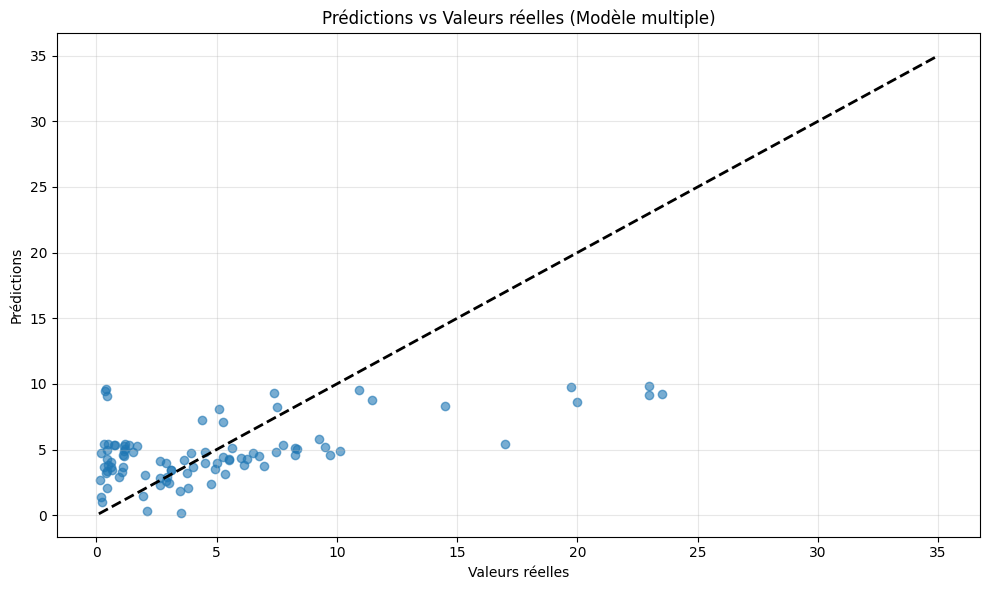

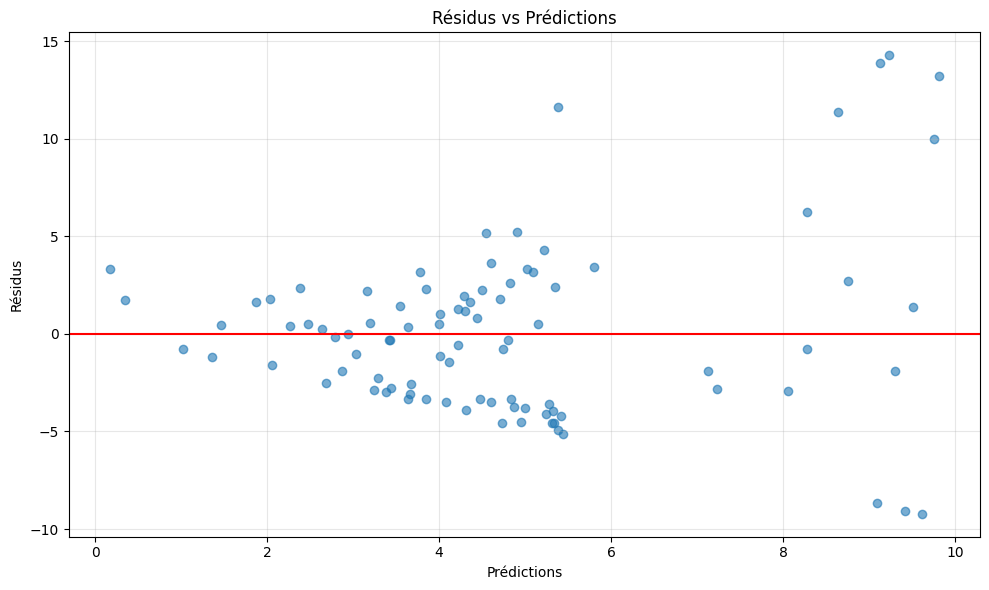

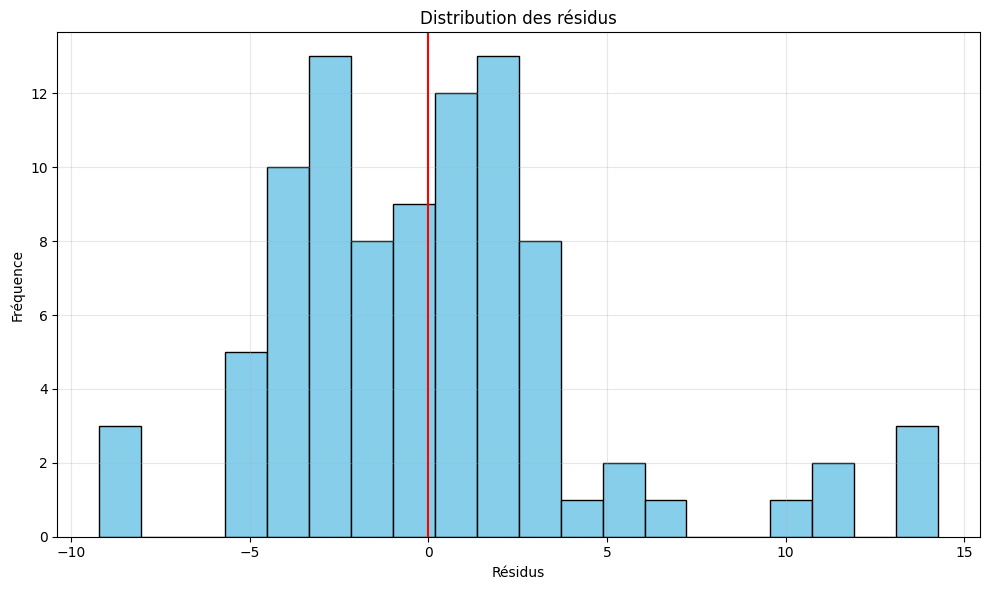

In [89]:
# Comparaison des modèles
print("\nComparaison des modèles:")
print(f"R² du modèle univarié: {r2_score(y_test, y_pred):.4f}")
print(f"MSE du modèle univarié: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE du modèle univarié: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

print(f"\nR² du modèle multiple: {r2_multi:.4f}")
print(f"MSE du modèle multiple: {mse_multi:.4f}")
print(f"RMSE du modèle multiple: {np.sqrt(mse_multi):.4f}")

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.6)
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'k--', lw=2)
plt.title('Prédictions vs Valeurs réelles (Modèle multiple)')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyse des résidus
residus = y_test_multi - y_pred_multi
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multi, residus, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Résidus vs Prédictions')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Distribution des résidus
plt.figure(figsize=(10, 6))
plt.hist(residus, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='-')
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 8 conclusion

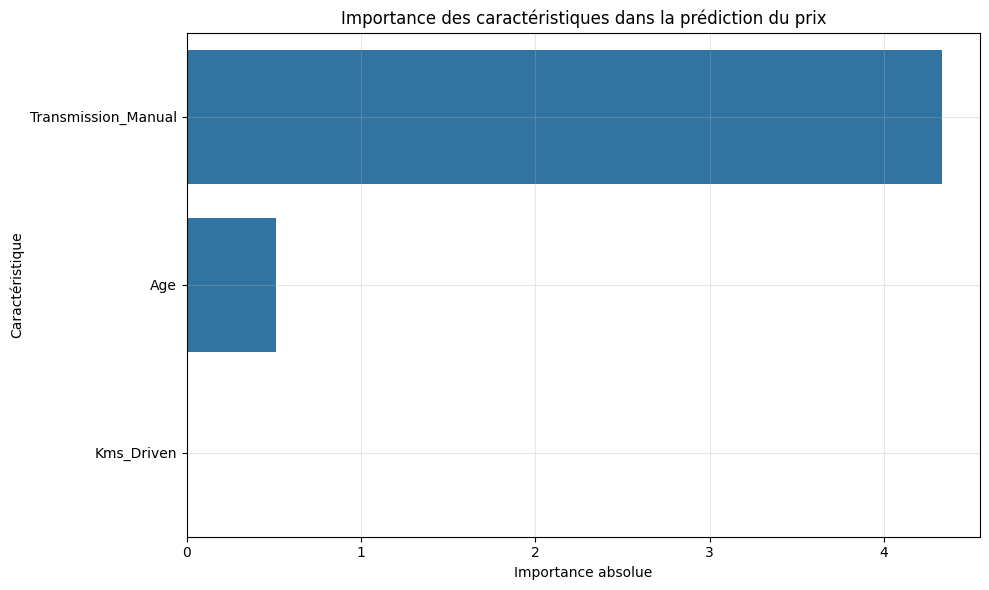


Conclusion de l'analyse:
Les facteurs contribuant au prix d'une voiture sont:
- Transmission_Manual: diminue le prix (coefficient: -4.3351)
- Age: diminue le prix (coefficient: -0.5107)
- Kms_Driven: augmente le prix (coefficient: 0.0000)


In [90]:
# Récapitulatif des facteurs influençant le prix
importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(model_multi.coef_)
})
importance = importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Importance des caractéristiques dans la prédiction du prix')
plt.xlabel('Importance absolue')
plt.ylabel('Caractéristique')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nConclusion de l'analyse:")
print("Les facteurs contribuant au prix d'une voiture sont:")
for i, row in importance.iterrows():
    feature = row['Feature']
    coef = model_multi.coef_[features.index(feature)]
    if coef > 0:
        direction = "augmente"
    else:
        direction = "diminue"
    print(f"- {feature}: {direction} le prix (coefficient: {coef:.4f})")

## 9

In [91]:
# Estimation pour Martin (voiture < 7 ans, < 100 000 km, boîte manuelle)
age_martin = 7  # Maximum 7 ans
km_martin = 100000  # Maximum 100 000 km
transmission_martin = 1  # Boîte manuelle (1 pour Oui, 0 pour Non)

# Création d'un DataFrame pour la prédiction
martin_df = pd.DataFrame({
    'Age': [age_martin],
    'Kms_Driven': [km_martin],
    'Transmission_Manual': [transmission_martin]
})

# Prédiction avec le modèle multiple
prix_estime = model_multi.predict(martin_df)[0]
print(f"\nEstimation pour Martin:")
print(f"Pour une voiture de {age_martin} ans, avec {km_martin} km et une boîte manuelle:")
print(f"Le prix estimé est de {prix_estime:.2f}")

# Calcul et affichage de l'intervalle de confiance (approximatif à 95%)
prediction_std = np.sqrt(mse_multi)
intervalle_inf = max(0, prix_estime - 1.96 * prediction_std)
intervalle_sup = prix_estime + 1.96 * prediction_std
print(f"Intervalle de confiance à 95%: [{intervalle_inf:.2f} - {intervalle_sup:.2f}]")



Estimation pour Martin:
Pour une voiture de 7 ans, avec 100000 km et une boîte manuelle:
Le prix estimé est de 6.14
Intervalle de confiance à 95%: [0.00 - 14.91]


## bonu

R² sur l'ensemble de test: 0.2136
MSE sur l'ensemble de test: 18.1153
MAE sur l'ensemble de test: 3.2104


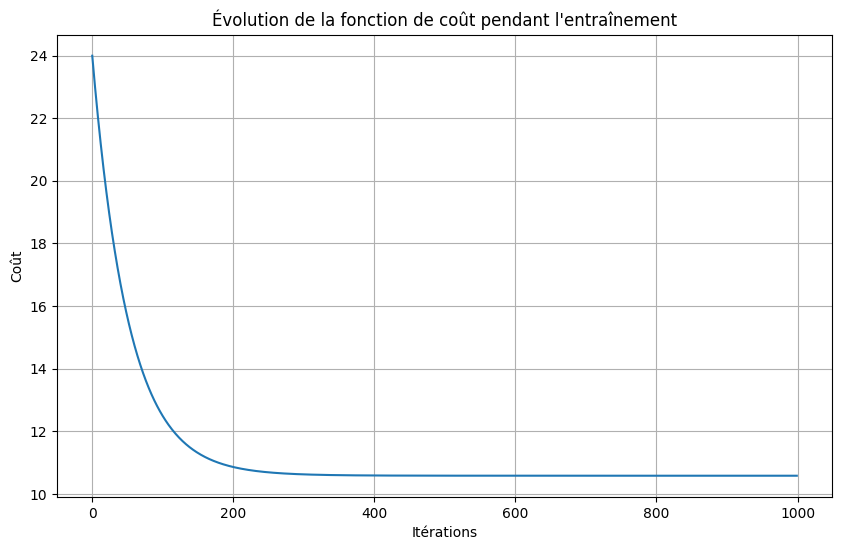


Comparaison avec scikit-learn:
R² scikit-learn: 0.2138
R² notre modèle: 0.2136
MSE scikit-learn: 18.1115
MSE notre modèle: 18.1153


In [92]:
from linearegression import CustomLinearRegression
from sklearn.preprocessing import StandardScaler

# Charger les données
df = pd.read_csv('carData.csv')

# Prétraitement
# Convertir les variables catégorielles en variables numériques
df = pd.get_dummies(df, drop_first=True)

# Sélectionner les caractéristiques et la cible
X = df[['Year', 'Kms_Driven', 'Transmission_Manual']].values
y = df['Selling_Price'].values

# Normaliser les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer et entraîner notre modèle personnalisé
model = CustomLinearRegression(learning_rate=0.01, n_iterations=1000, l2_penalty=0.1)
model.fit(X_train, y_train)

# Évaluer notre modèle
print(f"R² sur l'ensemble de test: {model.score(X_test, y_test):.4f}")
print(f"MSE sur l'ensemble de test: {model.mse(X_test, y_test):.4f}")
print(f"MAE sur l'ensemble de test: {model.mae(X_test, y_test):.4f}")

# Visualiser la convergence du modèle
plt.figure(figsize=(10, 6))
plt.plot(model.cost_history)
plt.title('Évolution de la fonction de coût pendant l\'entraînement')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.grid(True)
plt.show()

# Comparer avec scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Entraîner le modèle scikit-learn
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

# Prédictions
sk_y_pred = sk_model.predict(X_test)
custom_y_pred = model.predict(X_test)

# Évaluer le modèle scikit-learn
print("\nComparaison avec scikit-learn:")
print(f"R² scikit-learn: {r2_score(y_test, sk_y_pred):.4f}")
print(f"R² notre modèle: {model.score(X_test, y_test):.4f}")
print(f"MSE scikit-learn: {mean_squared_error(y_test, sk_y_pred):.4f}")
print(f"MSE notre modèle: {model.mse(X_test, y_test):.4f}")